In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/data.csv


# import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
data = pd.read_csv("../input/brain-tumor/data.csv")

In [4]:
data.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [5]:
data.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [7]:
data.dtypes

Unnamed: 0     int64
X53416         int64
M83670         int64
X90908         int64
M97496         int64
               ...  
M13699.1       int64
X54489         int64
T55008         int64
M10065.2       int64
y             object
Length: 7466, dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,17.500000,378.750000,177.305556,128.027778,568.305556,93.555556,366.833333,140.166667,644.194444,73.444444,...,31.750000,71.111111,35.694444,53.194444,38.388889,40.944444,41.222222,57.027778,58.694444,44.027778
std,10.535654,648.716067,243.494655,787.935802,637.451928,557.527370,427.166645,171.443202,685.514231,88.504219,...,50.036201,118.940748,127.437115,269.630628,47.619490,83.763935,251.147778,71.322001,336.030766,224.891782
min,0.000000,-694.000000,-117.000000,-50.000000,8.000000,-54.000000,-6.000000,-18.000000,-8.000000,-8.000000,...,-21.000000,-24.000000,-12.000000,-1484.000000,-73.000000,-16.000000,-23.000000,-5.000000,-17.000000,-214.000000
25%,8.750000,-95.750000,-31.000000,-13.250000,47.250000,-7.000000,27.250000,17.750000,33.250000,8.250000,...,1.500000,9.000000,-1.250000,59.250000,12.750000,3.500000,-4.750000,7.000000,-5.000000,-72.750000
50%,17.500000,194.500000,117.000000,-4.500000,293.500000,3.000000,110.500000,37.500000,333.500000,37.500000,...,10.000000,55.500000,3.000000,94.000000,36.000000,7.000000,0.000000,20.000000,1.500000,-12.000000
75%,26.250000,721.750000,330.500000,14.000000,1079.250000,10.250000,675.000000,268.500000,1185.250000,107.750000,...,48.000000,78.750000,6.000000,121.250000,64.000000,39.500000,6.500000,98.250000,7.000000,74.250000
max,35.000000,1815.000000,718.000000,4723.000000,2261.000000,3344.000000,1354.000000,718.000000,2203.000000,357.000000,...,156.000000,686.000000,686.000000,251.000000,138.000000,444.000000,1505.000000,271.000000,2018.000000,1089.000000


In [11]:
# sns.pairplot(data,hue = data['y'])

In [12]:
data['y'].value_counts()

tumor     18
Normal    18
Name: y, dtype: int64

# Encoding the categorical variable -- using get dummies function

In [13]:
get_dummies = pd.get_dummies(data['y'])

In [14]:
get_dummies

,Normal,tumor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [15]:
#add the dummies columns into original dataset
data = pd.concat([data,get_dummies],axis=1)

In [16]:
data.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y,Normal,tumor
0,0,70,-81,25,10,22,113,36,163,9,...,68,138,53,-4,123,2,19,tumor,0,1
1,1,108,-30,-7,60,0,24,8,113,-3,...,60,93,140,-3,271,-1,-51,tumor,0,1
2,2,75,-1,5,48,6,34,27,35,-1,...,94,62,39,-14,127,7,192,tumor,0,1
3,3,871,4,14,78,-6,85,65,227,19,...,78,30,87,-4,59,3,367,tumor,0,1
4,4,-92,-34,14,19,11,-6,27,-8,9,...,204,81,105,9,265,-2,126,tumor,0,1


In [17]:
#drop the y and Normal columns 
data = data.drop(['y','Normal'],axis=1)

In [18]:
data.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,tumor
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,1
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,1
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,1
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,1
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,1


In [19]:
data = data.drop('Unnamed: 0',axis=1)

# Feature Selection

# Univariate selection

In [20]:
x = data.drop('tumor',axis=1)
y = data['tumor']

In [21]:
print(x.shape)

(36, 7464)


# Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[0.         0.00910873 0.         ... 0.         0.         0.        ]


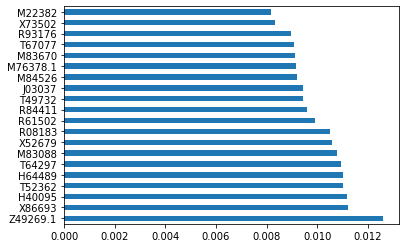

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

**Here is display the top 20  columns those are correlated with the dependent variable**

# correlation

In [25]:
corr=data.iloc[:,:-1].corr()
# top_features=corr.index
# plt.figure(figsize=(20,20))
# sns.heatmap(data[top_features].corr(),annot=True)
# plt.show()

In [26]:
# threshold=0.8
# # find and remove correlated features
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [27]:
# correlation(data.iloc[:,:-1],threshold)

# Information Gain

In [28]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
col = mutual_data.sort_values(ascending=False)

In [29]:
col.head(10)

M97496    0.707229
R36977    0.688710
T96548    0.680840
Z50753    0.649017
M83670    0.643803
M77836    0.642150
H20426    0.639699
T64297    0.630035
U17077    0.624524
R08183    0.609699
dtype: float64

In [30]:
data = data[['M97496','R36977','T96548','Z50753','M83670','M77836','J03037.2','T64297','U17077','tumor']]

In [31]:
data.head()

,M97496,R36977,T96548,Z50753,M83670,M77836,J03037.2,T64297,U17077,tumor
0,10,159,163,35,-81,108,2,249,16,1
1,60,100,113,26,-30,106,7,131,40,1
2,48,94,35,25,-1,123,7,228,35,1
3,78,87,227,41,4,51,4,661,29,1
4,19,91,-8,29,-34,122,3,125,47,1


In [32]:
data.size

360

In [33]:
data.columns

Index(['M97496', 'R36977', 'T96548', 'Z50753', 'M83670', 'M77836', 'J03037.2',
       'T64297', 'U17077', 'tumor'],
      dtype='object')

In [34]:
data.isnull().sum()

M97496      0
R36977      0
T96548      0
Z50753      0
M83670      0
M77836      0
J03037.2    0
T64297      0
U17077      0
tumor       0
dtype: int64

In [35]:
data.duplicated().sum()

0

In [36]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc1 = accuracy_score(y_test, y_pred)

[[4 0]
 [0 5]]


In [42]:
print(acc1)

1.0


# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

In [44]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

[[4 0]
 [0 5]]


In [45]:
acc2 = accuracy_score(y_test, pred)
print("Accuracy: ",acc2)

Accuracy:  1.0


# Applying k-Fold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


# create visualization of models with their accuracy score:

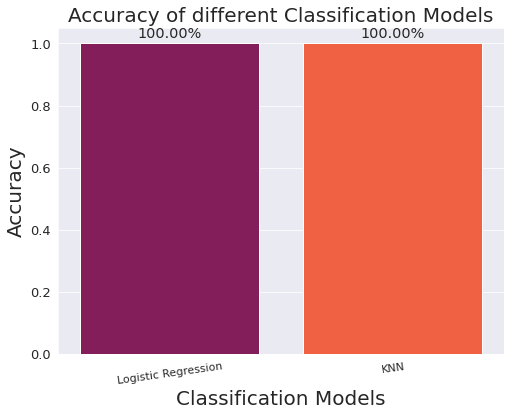

In [47]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("KNN")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()